In [26]:
#@title Imports
import random as rand
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from matplotlib.image import imread



In [27]:
#@title Inputs
safe_places = 2 #@param {type:"number"}
population_places = 6 #@param {type:"number"}
maximum_time= 3 #@param {type:"slider", min:1, max:30, step:0.1}
image = "" #@param {type:"string"}
new_set = False #@param {type:"boolean"}

In [28]:
#@title Euclidean distance
def dis(p0, p1):
  return (abs(x[p0]-x[p1])**2+abs(y[p0]-y[p1])**2)**0.5

ValueError: ignored

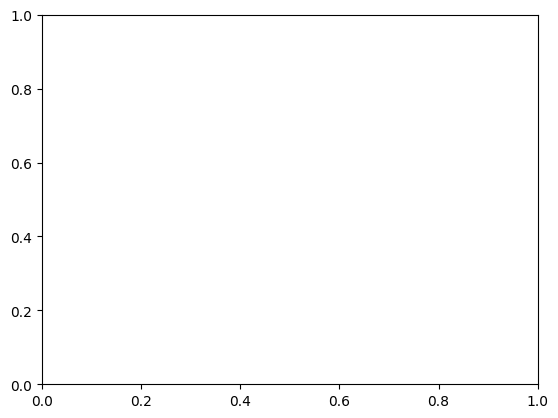

In [29]:
#@title Generating the graph
points_number=safe_places+population_places
if new_set:
  x = [rand.randint(0,50) for _ in range(0,points_number)]
  y = [rand.randint(0,50) for _ in range(0,points_number)]
  w = [rand.randint(1,6) for _ in range(0,points_number)]
# Load the image
if image!="":
  img = imread(image)
  plt.imshow(img, extent=[0, 55, 0, 55], aspect='auto')
plt.plot(x, y, 'o', color='black');
max_len = maximum_time*10
edges= [[] for _ in range(points_number)]
for i in range(points_number):
  for j in range(i):
    if dis(i,j)<=max_len:
      edges[i].append(j)
      edges[j].append(i)
print(edges)
for i in range(points_number):
  for j in edges[i]:
    plt.plot([x[i],x[j]],[y[i],y[j]])
    
plt.savefig("a")
plt.show()

In [30]:
#@title Scoring
def distance_score(t):
  return -1

In [35]:
#@title Brute force
comb = combinations(list(range(points_number)), safe_places)
best_score=1e18
best_places =[]
for safe_places_tuble in comb:
  score = 0
  for point in range(points_number):
    for safe_point in safe_places_tuble:
      if safe_point in edges[point]:
        score+=-1      
  if best_score>score:
    best_score=score
    best_places = list(safe_places_tuble)
print(best_places) 
print(best_score)


-8
[5, 6]
-12


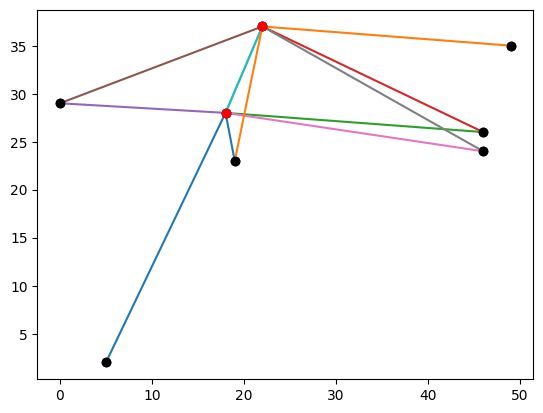

In [19]:
#@title Plotting the answer
plt.clf()
plt.plot(x, y, 'o', color='black');
for point in range(points_number):
  for safe_point in best_places:
    if safe_point in edges[point]:
      plt.plot([x[safe_point],x[point]],[y[safe_point],y[point]])
plt.plot(x, y, 'o', color='black');
for v in best_places:
  plt.plot(x[v], y[v], 'o', color='red');

plt.savefig("b")
  

In [23]:
#@title Creating Edge list
edges_list=[]
for i in range(points_number):
   for x in edges[i]:
     if x>i:
       edges_list.append([i,x])
edges_list

[[0, 3],
 [0, 5],
 [0, 7],
 [1, 2],
 [1, 4],
 [1, 6],
 [2, 4],
 [2, 5],
 [2, 6],
 [2, 7],
 [3, 5],
 [3, 6],
 [3, 7],
 [4, 5],
 [4, 6],
 [4, 7],
 [5, 6],
 [5, 7],
 [6, 7]]